## Language Detection by Short Word Based Approach(k=150)

## Libraries

In [1]:
import pandas as pd
import seaborn as sns #Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
import matplotlib.pyplot as plt
import math
import string
import re
import numpy as np # multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
from collections import OrderedDict

## Load dataset

In [2]:
lang_list = ['Danish', 'Dutch', 'English', 'French', 'German', 'Greek','Italian', 'Portugeese', 'Spanish', 'Sweedish', 'Turkish']
data = pd.read_csv('language_detection.csv',sep=';')   #store big data sets is to use CSV files
				                    #need to import pd library
				                    #stores dataset.csv to data

In [3]:
data.head() #displays the first five rows of the dataframe by default.

,Text,language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
data['language'].value_counts()
#data['Text'][37]
#data['language'][37]

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Sweedish       676
Dutch          546
Turkish        474
German         470
Danish         428
Greek          365
Name: language, dtype: int64

## Visualize dataset

c:\Users\SERRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='count'>

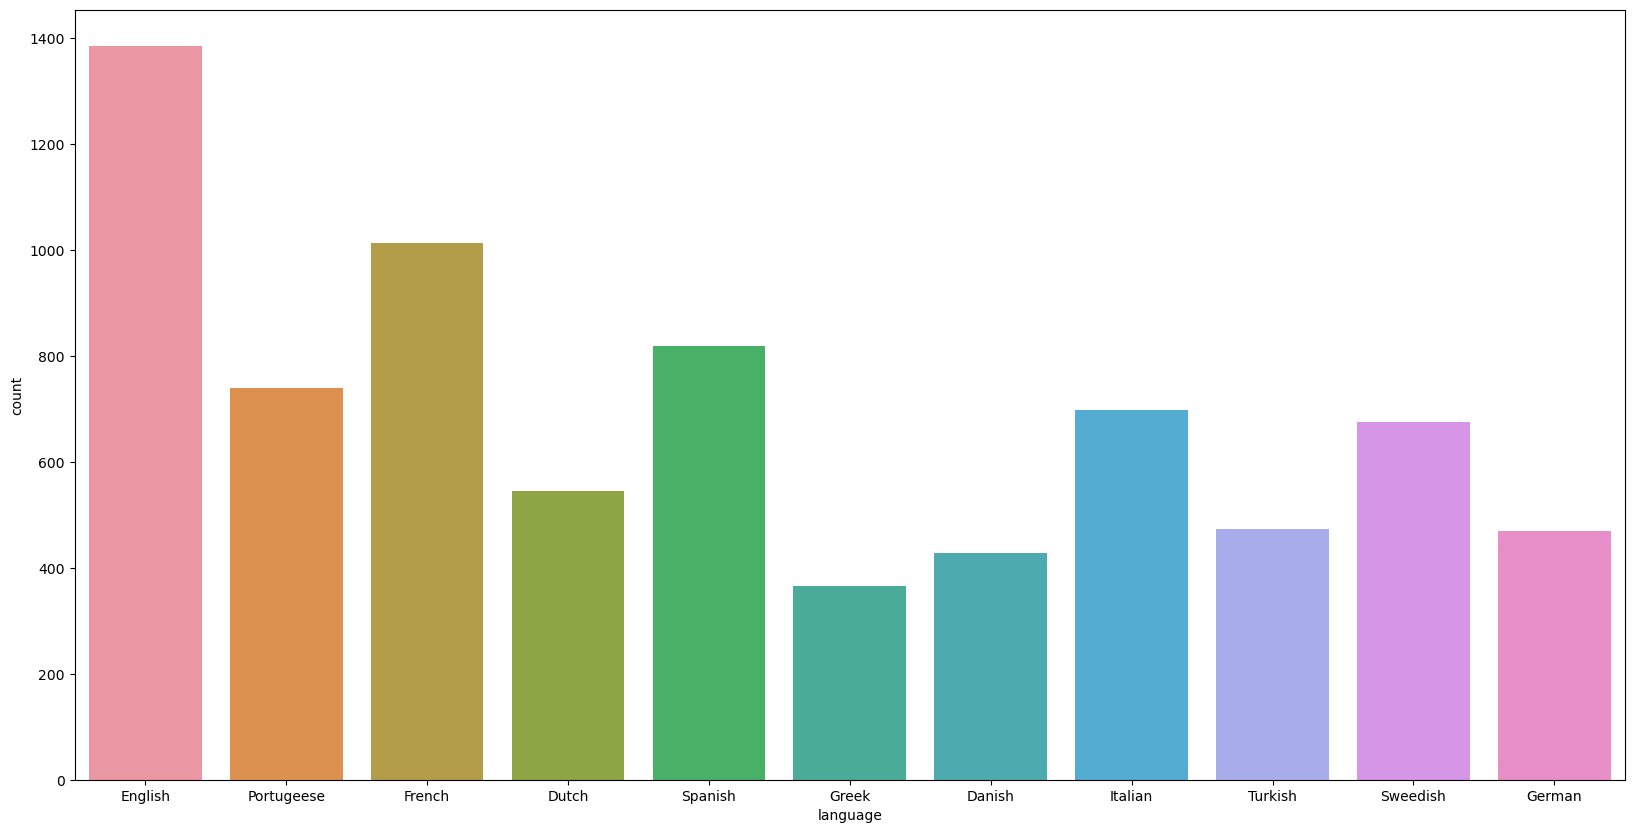

In [5]:
plt.figure(figsize=(20,10))
sns.countplot(data['language']) #seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

## punctuation

In [6]:
characters = string.punctuation+"0"+"1"+"2"+"3"+"4"+"5"+"6"+"7"+"8"+"9"
characters

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [7]:
#funtion to remove punctuation and all smallcase letters#
def remove_pun(text):
    for pun in characters:
        text=text.replace(pun,"")
    text = text.lower()
    return(text)

In [8]:
data['Text']=data['Text'].apply(remove_pun)

In [9]:
data.head()

,Text,language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,the word nature is borrowed from the old fren...,English


In [10]:
data.loc[data['language'] == 'English', 'Text']

0        nature in the broadest sense is the natural p...
1       nature can refer to the phenomena of the physi...
2       the study of nature is a large if not the only...
3       although humans are part of nature human activ...
4        the word nature is borrowed from the old fren...
                              ...                        
1380    what your mistake was come lets feed you somet...
1381    narcisa changed her ways she struggled at firs...
1382    hows narcissism now marian told them both ever...
1383    has she i guess she wouldnt want any more gold...
1384    terry you actually look a little like that ang...
Name: Text, Length: 1385, dtype: object

### splitting data into train and test sets

In [11]:
y=data['language'].values
print("y.shape: ",y.shape)
x=data['Text'].values
print("x.shape: ",x.shape)

y.shape:  (7614,)
x.shape:  (7614,)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
print("x_train.shape: ",x_train.shape)
print("y_train.shape: ",y_train.shape)
print("x_test.shape: ",x_test.shape)
print("y_test.shape: ",y_test.shape)

x_train.shape:  (6091,)
y_train.shape:  (6091,)
x_test.shape:  (1523,)
y_test.shape:  (1523,)


### Display TrainDataset

In [14]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'Text'})
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'Language'})
df_train=pd.concat([df1,df2],axis=1)
df_train.head()

,Text,Language
0,ne le mentionnez pas,French
1,spinoza reviendra sur les propos de descartes ...,French
2,ve bu videoda size günlük kullanım için ve bu ...,Turkish
3,foi classificada como a revista científica ma...,Portugeese
4,quando senti una frase esercitati a dirla dopo...,Italian


In [15]:
df_train['Language'].value_counts()

English       1105
French         804
Spanish        669
Portugeese     591
Italian        558
Sweedish       524
Dutch          443
Turkish        385
German         382
Danish         338
Greek          292
Name: Language, dtype: int64

### Display Test Dataset

In [16]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'Text'})
df4=pd.DataFrame(y_test)
df4=df4.rename(columns={0:'Language'})
df_test=pd.concat([df3,df4],axis=1)
df_test.head()

,Text,Language
0,a qualquer momento,Portugeese
1,​ en marzo de jimmy wales creó nupedia un pro...,Spanish
2,pensava di essere troppo grande per fare quals...,Italian
3,αν κάτι σας εκπλήσσει μπορείτε επίσης να πείτε...,Greek
4,om het woord catch te gebruiken,Dutch


In [17]:
df_test.shape

(1523, 2)

### Generate language corpuses

In [18]:
#genarete corpus for each language
lang_corpus={}
str=""
for lang in lang_list:
    str=""
    for text in df_train.loc[df_train['Language'] == lang, 'Text']:
        str = str+' '+text
    lang_corpus[lang] = str
print(lang_corpus)

{'Danish': ' er en meget fransk måde at sige møde eller dato på for eksempel har jeg et møde med mine venner over frokosten på lørdag eller jeg planlægger at møde med mine venner i indkøbscentret for film at møde kan bruges både som substantiv eller som verbum for eksempel hej hvorfor hænger du ikke med os du kan sige til dem jeg er ked af det men jeg er oversvømmet med arbejde eller jeg er oversvømmet med nogle andre ord som du kan bruge i stedet for oversvømmet hvis jeg har for meget at gøre nej slet ikke ikke meget åh fjollet han er rig og smuk hvad mere kan jeg ønske mig forfærdelse jeg accepterer dit forslag  i  modtog nature prince of asturias award for communications and humanity sammen med science desværre er jeg nødt til at sige nej med krydsede fingre jeg har det godt undskyld så hvis du lige er ved at starte din rejse det ville være rart ved hans egen refleksion i spejlet eller turisten blev flummoxed af de forskellige skikke der jeg har en rendezvous med mine venner i aften

In [19]:
print(lang_corpus['Turkish'])

 ve bu videoda size günlük kullanım için ve bu videonun sonunda  akıllı kelime vereceğim bu kişiyi bir kez daha tekrar etmeye sevk ettiği anlamına gelir pekala başlayalım normalde bir eserin yazarı o yazının telif hakkını elinde bulundurur ve bu hak diğer insanların bu yazıyı değiştirmesini ve kopyalamasını engeller biri gerçekten iyi gidiyorsa bunu yapabilirsin onlara iyi işi sürdürmelerini senin kadar iyi gibi iyi işlere devam etmelerini söyleyebilirsin ve iyi işi sürdürmeye devam et başka bir deyim olmaya devam et ve bu da amerikalılar söyle emeğiniz için teşekkür ederiz alexaya göre vikipedi ziyaretçilerinin i i̇ngilizce vikipedi sitesini ziyaret etmektedir özgür görünmesine rağmen bilgiyi yazan kişi telif hakkına sahiptir ancak diğer insanların bu bilgilerden yararlanmasına ve geliştirmesine izin vermektedir ve bununla birlikte arabasına bindi ve annesiyle vedalaşmadan melekle birlikte yolculuk ederken araba aniden büyülü bir geçide girdi ve arabanın muazzam bir şekilde çarptığı f

### generate_short_words

In [20]:

def generate_short_words(text):
  shortwords={}
  words = re.sub('\s+', ' ', text).strip() 
  words=[word for word in text.split(" ")]  
  #print("Words in the sentence:",words)
  sum_freq=0 #sum of frequencies of all short words
  for w in words:
    if len(w)<=5 and w!='':
      sum_freq+=1
      if w in shortwords:
        shortwords[w]+=1
      else:
        shortwords[w]=1
  #print ("shortwords with word_count:",shortwords)
  #print(shortwords.keys())
  #print("sum_freq", sum_freq)
  #print(len(shortwords.keys()))
  #total = len(shortwords.keys()) #total number of short words in the text
  for key in shortwords.keys():
    shortwords[key] = round(math.log(shortwords[key] / (sum_freq)), 3)                                          
  shortwords = sorted(shortwords.items(), key= lambda x : x[1], reverse = True) 
  #print (shortwords)
  final_words = []
  log_probs = []
  k= 50 if len(shortwords)>=50 else len(shortwords)
  for i in range(k):#get top k grams#len(grams)
          final_words.append(shortwords[i][0])
          log_probs.append(shortwords[i][1])
  return final_words, log_probs
  #return shortwords

In [21]:
example= "When I up late Showed up late"
generate_short_words(example)
#generate_short_words(lang_corpus['Turkish'])

(['up', 'late', 'When', 'I'], [-1.099, -1.099, -1.792, -1.792])

In [22]:
shortwords = {}
for lang in lang_corpus.keys():
    shortwords[lang] = generate_short_words(lang_corpus[lang])      
print(shortwords)

{'Danish': (['du', 'er', 'at', 'og', 'jeg', 'det', 'i', 'en', 'ikke', 'kan', 'har', 'på', 'til', 'med', 'for', 'af', 'så', 'dig', 'som', 'den', 'der', 'var', 'hvis', 'et', 'mig', 'eller', 'hvad', 'sige', 'om', 'ord', 'ved', 'meget', 'vil', 'nogen', 'noget', 'de', 'men', 'dette', 'hun', 'være', 'godt', 'han', 'ville', 'min', 'denne', 'over', 'nogle', 'gøre', 'kunne', 'gå'], [-3.006, -3.213, -3.213, -3.286, -3.318, -3.344, -3.666, -3.714, -3.794, -3.929, -4.114, -4.174, -4.189, -4.221, -4.237, -4.288, -4.288, -4.288, -4.341, -4.378, -4.52, -4.542, -4.659, -4.737, -4.737, -4.765, -4.765, -4.852, -4.852, -4.883, -4.883, -4.947, -4.981, -4.981, -5.052, -5.09, -5.129, -5.213, -5.257, -5.353, -5.404, -5.458, -5.458, -5.458, -5.458, -5.576, -5.576, -5.64, -5.64, -5.64]), 'Dutch': (['je', 'het', 'de', 'een', 'en', 'van', 'dat', 'ik', 'in', 'is', 'niet', 'te', 'op', 'als', 'zijn', 'met', 'of', 'om', 'die', 'wat', 'voor', 'was', 'ze', 'dit', 'er', 'kunt', 'zo', 'mijn', 'over', 'kan', 'door', 'me'

In [23]:
for lang in shortwords.keys():
    print("shortword count in ",lang,": ",len(shortwords[lang][0]))

shortword count in  Danish :  50
shortword count in  Dutch :  50
shortword count in  English :  50
shortword count in  French :  50
shortword count in  German :  50
shortword count in  Greek :  50
shortword count in  Italian :  50
shortword count in  Portugeese :  50
shortword count in  Spanish :  50
shortword count in  Sweedish :  50
shortword count in  Turkish :  50


### distance

In [24]:
def distance(test_words, train_words):
    dist = {lang: 0 for lang in lang_list} # distance corresponding to each language
    for w in test_words[0]: 
        for lang in train_words.keys():
            idx_2 = test_words[0].index(w)
            if w in shortwords[lang][0] : 
                idx = shortwords[lang][0].index(w)
                dist[lang] += abs(shortwords[lang][1][idx] - test_words[1][idx_2]) 
            else: # w is not present in that language's short word list
                dist[lang] += abs(test_words[1][idx_2])
                # penalty term: corresponding probabaility value of the short word in test_words
    return dist   

In [25]:
test='bir nesnenin başka bir nesne üzerine uyguladığı yükün yüzey altında oluşturduğu gerilmeler o nesnenin gerilme direncinin üzerine çıkarak yüzey altında çatlaklar oluşturular bu çatlaklar yüzey altında ilerleyip yüzeye ulaştıklarında yüzey parçacıklar kavkıma görünümünde serbest kalırlar bu aşınma yöntemi'
testwords = generate_short_words(test)
print(testwords)

(['yüzey', 'bir', 'bu', 'başka', 'nesne', 'yükün', 'o'], [-1.099, -1.792, -1.792, -2.485, -2.485, -2.485, -2.485])


In [26]:
a=distance(testwords,shortwords)
a

{'Danish': 14.622999999999998,
 'Dutch': 14.622999999999998,
 'English': 14.622999999999998,
 'French': 14.622999999999998,
 'German': 14.622999999999998,
 'Greek': 14.622999999999998,
 'Italian': 14.022999999999998,
 'Portugeese': 12.965999999999998,
 'Spanish': 14.068999999999999,
 'Sweedish': 14.622999999999998,
 'Turkish': 12.341}

### Language detection function

In [27]:
def language_detection(test_text):
    #get rid of punctuation
    test_text=remove_pun(test_text)
    test_words = generate_short_words(test_text)
    distances=distance(test_words,shortwords)
    #print(distances)
      
    return min(distances, key=distances.get)

In [28]:
test='bir!! nesnenin başka bir nesne üzerine uyguladığı yükün yüzey altında oluşturduğu gerilmeler o nesnenin gerilme direncinin üzerine çıkarak yüzey altında çatlaklar oluşturular bu çatlaklar yüzey altında ilerleyip yüzeye ulaştıklarında yüzey parçacıklar kavkıma görünümünde serbest kalırlar bu aşınma yöntemi'
language_detection(test)

'Turkish'

### Apply language_detection on df_test

In [29]:
i=0
predict=[]
for text in df_test['Text']:
    predict.append(language_detection(text))
    #print("predict:"+predict[i])
    i=i+1
print(predict)    
print(len(predict))

['Danish', 'Spanish', 'Italian', 'Greek', 'English', 'Danish', 'Dutch', 'Portugeese', 'French', 'Dutch', 'Portugeese', 'English', 'Danish', 'Sweedish', 'Danish', 'Portugeese', 'Danish', 'English', 'Portugeese', 'Spanish', 'Danish', 'French', 'Portugeese', 'Danish', 'Sweedish', 'English', 'Spanish', 'Danish', 'English', 'Danish', 'Dutch', 'Spanish', 'French', 'Greek', 'English', 'Portugeese', 'Portugeese', 'Danish', 'English', 'Sweedish', 'English', 'Danish', 'Danish', 'English', 'French', 'Danish', 'Spanish', 'French', 'Danish', 'Danish', 'Danish', 'Danish', 'Danish', 'Danish', 'Spanish', 'Spanish', 'Italian', 'Dutch', 'Portugeese', 'English', 'Danish', 'Danish', 'Danish', 'French', 'Dutch', 'Spanish', 'Portugeese', 'Italian', 'Spanish', 'Danish', 'English', 'Portugeese', 'Portugeese', 'French', 'Dutch', 'English', 'Sweedish', 'Greek', 'Dutch', 'French', 'English', 'French', 'English', 'Danish', 'Spanish', 'English', 'Spanish', 'Danish', 'English', 'Danish', 'Spanish', 'English', 'Engl

### Evaluate accuracy

In [30]:
data = {
  "Text": df_test["Text"],
  "Actual": df_test["Language"], #y_test=df_test["Language"]
  "Predicted": predict,
}
df_compare = pd.DataFrame(data)
df_compare

,Text,Actual,Predicted
0,a qualquer momento,Portugeese,Danish
1,​ en marzo de jimmy wales creó nupedia un pro...,Spanish,Spanish
2,pensava di essere troppo grande per fare quals...,Italian,Italian
3,αν κάτι σας εκπλήσσει μπορείτε επίσης να πείτε...,Greek,Greek
4,om het woord catch te gebruiken,Dutch,English
...,...,...,...
1518,auf grausame weise wird manchmal in gefängniss...,German,German
1519,bilmiyorum diyor,Turkish,Danish
1520,ook werd in een platenhoes niet verwijderd n...,Dutch,Dutch
1521,el proyecto wikipedia se inició el de enero de,Spanish,English


In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(df_test["Language"],predict))
print(confusion_matrix(df_test["Language"],predict))

0.5364412344057781
[[ 51  17  12   3   1   0   0   0   3   3   0]
 [ 36  46   9   2   0   0   0   0  10   0   0]
 [ 57  10 193   3   0   0   6   7   0   4   0]
 [ 34   6   7 118   1   0   2  11  30   1   0]
 [ 43   7   4   1  27   1   1   3   1   0   0]
 [ 32   0   0   0   0  41   0   0   0   0   0]
 [ 43   0   4   3   0   0  77   8   3   2   0]
 [ 42   0  10   4   1   0   5  72  14   0   0]
 [ 37   1   7   7   0   0   0  13  85   0   0]
 [ 24  29   5   1   0   0   0   0   4  89   0]
 [ 60   2   3   1   0   0   0   1   4   0  18]]


In [32]:
from sklearn.metrics import f1_score

In [33]:
#F-SCORE
f1_score(df_test["Language"], predict,labels=lang_list, average=None)

array([0.18579235, 0.41628959, 0.72284644, 0.66855524, 0.45762712,
       0.71304348, 0.66666667, 0.54752852, 0.55921053, 0.70916335,
       0.3364486 ])

### GUI

In [34]:
import tkinter as tk

In [35]:
# Top level window
frame = tk.Tk()
frame.title("shortword_LD")
frame.geometry('400x200')
# Function for getting Input
# from textbox and printing it 
# at label widget
  
def printInput():
    inp = inputtxt.get(1.0, "end-1c")
    lbl.config(text = "Predicted Language: "+language_detection(inp))
  
# TextBox Creation
inputtxt = tk.Text(frame,
                   height = 5,
                   width = 40)
  
inputtxt.pack()
  
# Button Creation
printButton = tk.Button(frame,
                        text = "Predict", 
                        command = printInput)
printButton.pack()
  
# Label Creation
lbl = tk.Label(frame, text = "")
lbl.pack()
frame.mainloop()